# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
import math
%matplotlib inline

### Reading the Mosaic Image

In [2]:
# I created two separate functions to read bmp image ad jpg. Could have done just one but I have one using cv2.imread
# and other one with plt.imread
def read_image_bmp(IMG_NAME):
    
    IMG_DIR = 'images/'
    img = cv2.imread(IMG_DIR+IMG_NAME)
    return img

def read_image_jpg(IMG_NAME):
    
    IMG_DIR = 'images/'
    img = plt.imread(IMG_DIR+IMG_NAME)
    return img

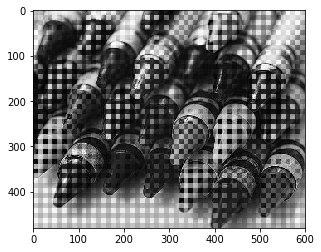

In [3]:
#DISPLAY crayons mosaic
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image_bmp(IMG_NAME).astype(float)

plt.imshow(mosaic_img.astype(int))
plt.show()


### Linear Interpolation

In [37]:
def get_solution_image(image):
    mshape = image.shape
    red_or_blue = np.array([[1/4, 1/2, 1/4],
                            [1/2, 1,   1/2],
                            [1/4, 1/2, 1/4]])

    green = np.array([[0,   1/4, 0],
                      [1/4, 1,   1/4],
                      [0,   1/4, 0]])

    red_mask = np.zeros((mshape[0],mshape[1]))                  
    red_mask[0:-1:2,0:-1:2]  = 1

    green_mask = np.zeros((mshape[0],mshape[1]))
    green_mask[0:-1:2,1:-1:2]  = 1
    green_mask[1:-1:2,0:-1:2] = 1

    blue_mask = np.zeros((mshape[0],mshape[1]))
    blue_mask[1:-1:2,1:-1:2] = 1

    red_conv = scipy.ndimage.convolve(np.multiply(image[:,:,0],red_mask), red_or_blue, mode='mirror')
    green_conv = scipy.ndimage.convolve(np.multiply(image[:,:,0],green_mask), green, mode='mirror')
    blue_conv = scipy.ndimage.convolve(np.multiply(image[:,:,0],blue_mask), red_or_blue, mode='mirror')
    



    soln_image = np.zeros(mshape)
    soln_image[:,:,0] = red_conv
    soln_image[:,:,1] = green_conv
    soln_image[:,:,2] = blue_conv
    
    return soln_image
  

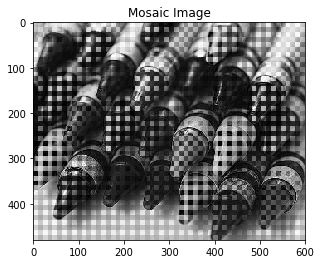

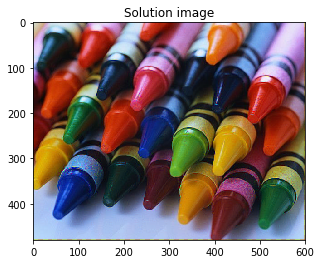

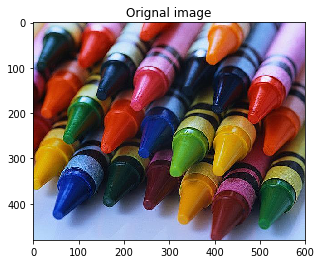

In [38]:
mosaic_img1 = read_image_bmp('crayons.bmp')
soln_image1 = get_solution_image(mosaic_img1)
original_image1 = read_image_jpg('crayons.jpg')

plt.imshow(mosaic_img1)
plt.title('Mosaic Image')
plt.show()

plt.imshow(soln_image1.astype(int))
plt.title('Solution image')
plt.show()

plt.imshow(original_image1)
plt.title('Orignal image')
plt.show()

In [32]:
def compute_errors(soln_image, original_image):
    
    #instead of just returning pp_err and max_err. I am also returning the sum of squared difference matrix
    
    picshape = np.shape(original_image)
    ssd = np.zeros((picshape[0], picshape[1]))
    
    #find the squared difference between sol and orig image.
    diff = np.zeros(picshape)
    
    diff = np.subtract(original_image,soln_image)
    diff = np.power(diff,2)
    ssd = np.sum(diff, axis=2)
    
#     diff = (original_image - soln_image)**2
    
#     ssd = diff[:,:,0]+diff[:,:,1]+diff[:,:,2]
    
    pp_err = np.average(ssd)
    pp_err = np.round(pp_err,2)
    
    max_err = np.amax(ssd) 

        
    return ssd, pp_err, max_err

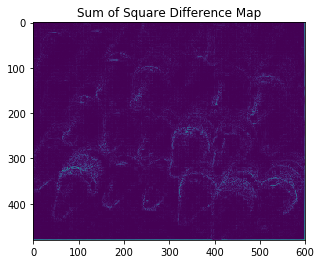

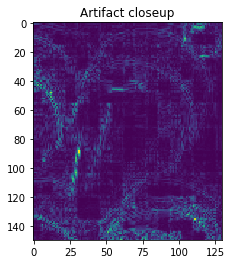

In [33]:
#displaying the square error map
sol_pic = get_solution_image(mosaic_img)
errormap, _, _ = compute_errors(sol_pic, original_image1)

errormap = np.sqrt(errormap).astype(int)

plt.imshow(errormap)
plt.title("Sum of Square Difference Map")
plt.show()

artifact = errormap[200:350,370:500]
plt.imshow(artifact)
plt.title("Artifact closeup")
plt.show()

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

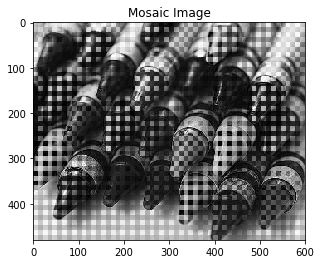

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


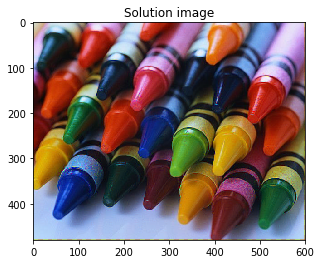

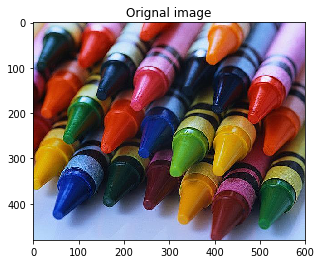

In [34]:
mosaic_img1 = read_image_bmp('crayons.bmp')
soln_image1 = get_solution_image(mosaic_img1)
original_image1 = read_image_jpg('crayons.jpg')

plt.imshow(mosaic_img1)
plt.title('Mosaic Image')
plt.show()

plt.imshow(soln_image1.astype(int))
plt.title('Solution image')
plt.show()

plt.imshow(original_image1)
plt.title('Orignal image')
plt.show()



In [36]:
ssd1, pp_err1, max_err1= compute_errors(soln_image1, original_image1)
print("The average per-pixel error for crayons is: "+str(pp_err1))
print("The maximum per-pixel error for crayons is: "+str(max_err1))

The average per-pixel error for crayons is: 518.39
The maximum per-pixel error for crayons is: 128702.0625


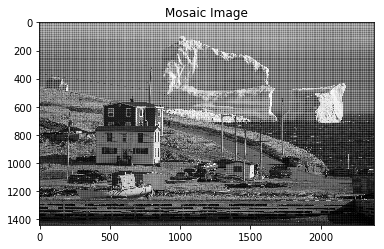

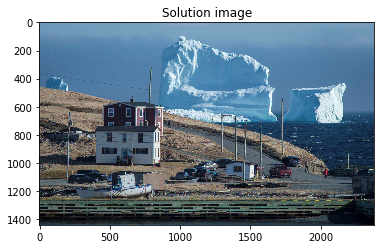

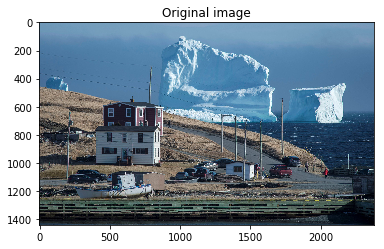

In [10]:
mosaic_img2 = read_image_bmp('iceberg.bmp')
soln_image2 = get_solution_image(mosaic_img2)

original_image2 = read_image_jpg('iceberg.jpg')
# For sanity check display your solution image here
plt.imshow(mosaic_img2)
plt.title('Mosaic Image')
plt.show()

plt.imshow(soln_image2.astype(int))
plt.title('Solution image')
plt.show()

plt.imshow(original_image2)
plt.title('Original image')
plt.show()

In [35]:
ssd2,pp_err2, max_err2 = compute_errors(soln_image2, original_image2)
print("The average per-pixel error for iceberg is: "+str(pp_err2))
print("The maximum per-pixel error for iceberg is: "+str(max_err2))

The average per-pixel error for iceberg is: 123.55
The maximum per-pixel error for iceberg is: 127534.0


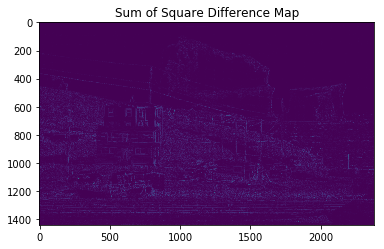

In [12]:
errormap2, _, _ = compute_errors(soln_image2, original_image2)

errormap2 = np.sqrt(errormap2).astype(int)

plt.imshow(errormap2)
plt.title("Sum of Square Difference Map")
plt.show()

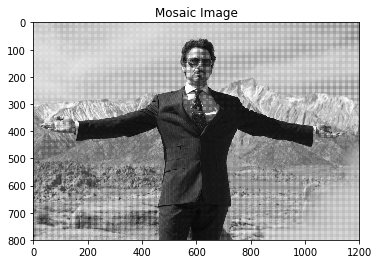

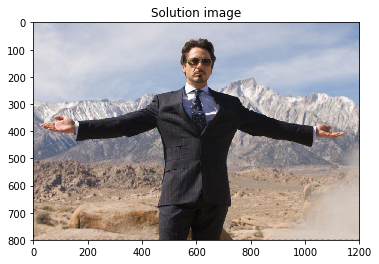

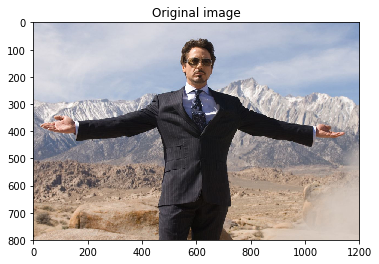

In [13]:
mosaic_img3 = read_image_bmp('tony.bmp')
soln_image3 = get_solution_image(mosaic_img3)
original_image3 = read_image_jpg('tony.jpg')

plt.imshow(mosaic_img3)
plt.title('Mosaic Image')
plt.show()

plt.imshow(soln_image3.astype(int))
plt.title('Solution image')
plt.show()

plt.imshow(original_image3)
plt.title('Original image')
plt.show()

In [14]:
ssd3, pp_err3, max_err3 = compute_errors(soln_image3, original_image3)
print("The average per-pixel error for tony is: "+str(pp_err3))
print("The maximum per-pixel error for tony is: "+str(max_err3))

The average per-pixel error for tony is: 132.2
The maximum per-pixel error for tony is: 89170.0


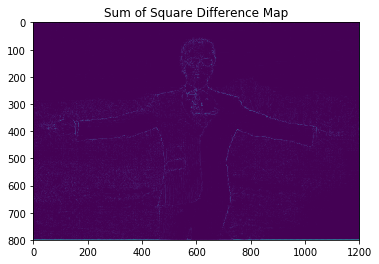

In [15]:
errormap3, _, _ = compute_errors(soln_image3, original_image3)

errormap3 = np.sqrt(errormap3).astype(int)

plt.imshow(errormap3)
plt.title("Sum of Square Difference Map")
plt.show()

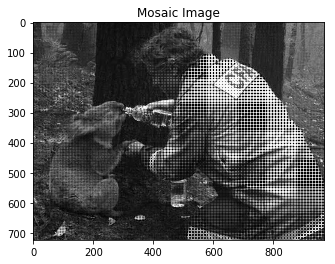

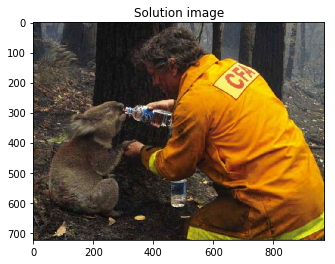

In [16]:
mosaic_img4 = read_image_bmp('hope.bmp')
soln_image4 = get_solution_image(mosaic_img4)

# Generate your solution image here and show it 
plt.imshow(mosaic_img4)
plt.title('Mosaic Image')
plt.show()

plt.imshow(soln_image4.astype(int))
plt.title('Solution image')
plt.show()

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [17]:
def get_freeman_solution_image(mosaic_img):

    freeman_soln_image = get_solution_image(mosaic_img)
    freeman_soln_image[:,:,0] = scipy.signal.medfilt2d(np.float32(freeman_soln_image[:,:,0]-freeman_soln_image[:,:,1])) + freeman_soln_image[:,:,1]
    freeman_soln_image[:,:,2] = scipy.signal.medfilt2d(np.float32(freeman_soln_image[:,:,2]-freeman_soln_image[:,:,1])) + freeman_soln_image[:,:,1]

    freeman_soln_image = np.uint8(freeman_soln_image).astype(int)

 
    return freeman_soln_image

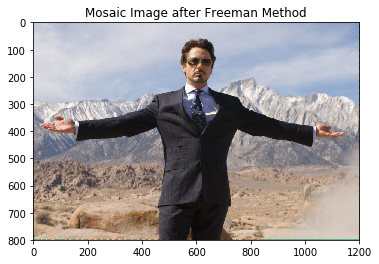

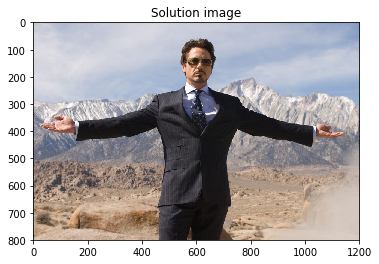

In [18]:
mosaic_img5 = read_image_bmp('tony.bmp')
soln_image5 = get_freeman_solution_image(mosaic_img5)
original_image5 = read_image_jpg('tony.jpg')


plt.imshow(soln_image5)
plt.title('Mosaic Image after Freeman Method')
plt.show()

plt.imshow(original_image5)
plt.title('Solution image')
plt.show()


In [19]:
_, pp_err5, max_err5 = compute_errors(soln_image5, original_image5)
print("The average per-pixel error for tony after Freeman is: "+str(pp_err5))
print("The maximum per-pixel error for tony after Freeman is: "+str(max_err5))

The average per-pixel error for tony after Freeman is: 134.68
The maximum per-pixel error for tony after Freeman is: 130050


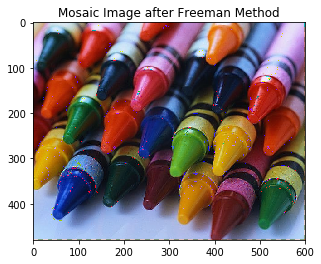

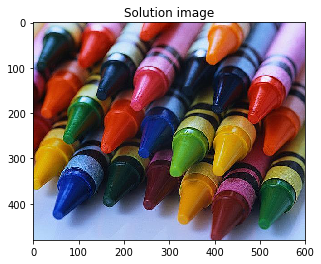

In [20]:
#CRAYON AGAIN BUT THIS TIME WITH FREENMAN
mosaic_img6 = read_image_bmp('crayons.bmp')
soln_image6 = get_freeman_solution_image(mosaic_img6)
original_image6 = read_image_jpg('crayons.jpg')


plt.imshow(soln_image6)
plt.title('Mosaic Image after Freeman Method')
plt.show()

plt.imshow(original_image6)
plt.title('Solution image')
plt.show()


In [21]:
_, pp_err6, max_err6 = compute_errors(soln_image6, original_image6)
print("The average per-pixel error for crayons after Freeman is: "+str(pp_err6))
print("The maximum per-pixel error for crayons after Freeman is: "+str(max_err6))

The average per-pixel error for crayons after Freeman is: 738.13
The maximum per-pixel error for crayons after Freeman is: 150146


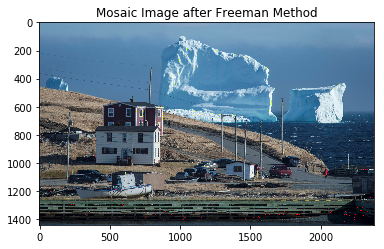

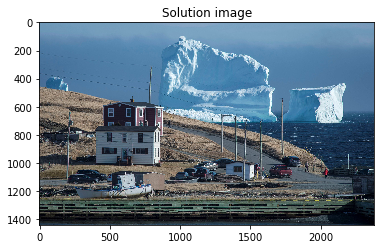

In [22]:
#Iceburg AGAIN BUT THIS TIME WITH FREENMAN
mosaic_img7 = read_image_bmp('iceberg.bmp')
soln_image7 = get_freeman_solution_image(mosaic_img7)
original_image7 = read_image_jpg('iceberg.jpg')


plt.imshow(soln_image7)
plt.title('Mosaic Image after Freeman Method')
plt.show()

plt.imshow(original_image7)
plt.title('Solution image')
plt.show()


In [23]:
_, pp_err7, max_err7 = compute_errors(soln_image7, original_image7)
print("The average per-pixel error for Iceberg after Freeman is: "+str(pp_err7))
print("The maximum per-pixel error for Iceberg after Freeman is: "+str(max_err7))

The average per-pixel error for Iceberg after Freeman is: 171.15
The maximum per-pixel error for Iceberg after Freeman is: 126509


### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [24]:
def get_mosaic_image(original_image):

    
    org_shape = np.shape(original_image)
    
    mosaic_img = np.zeros([org_shape[0],org_shape[1],3])
    
    #jpg order is RGB
    #for red
    mosaic_img[0:-1:2,0:-1:2,0] = original_image[0:-1:2,0:-1:2,0]
    
    #for green
    mosaic_img[0:-1:2,1:-1:2,0] = original_image[0:-1:2,1:-1:2,1] 
    mosaic_img[1:-1:2,0:-1:2,0] = original_image[1:-1:2,0:-1:2,1]
     
    #for blue
    mosaic_img[1:-1:2,1:-1:2,0] = original_image[1:-1:2,1:-1:2,2]
    
    #make it 3d
    mosaic_img[:,:,1] = mosaic_img[:,:,0]
    mosaic_img[:,:,2] = mosaic_img[:,:,0]
    mosaic_img = mosaic_img.astype(int)
    
    return mosaic_img

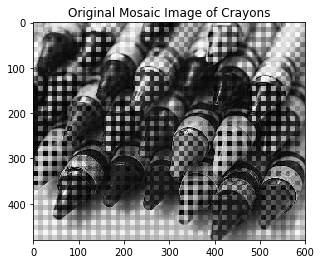

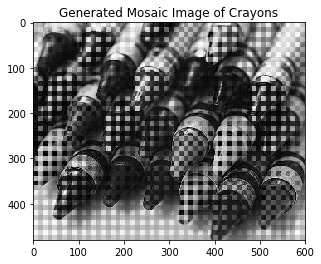

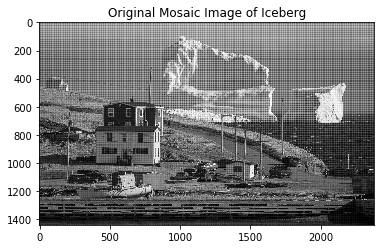

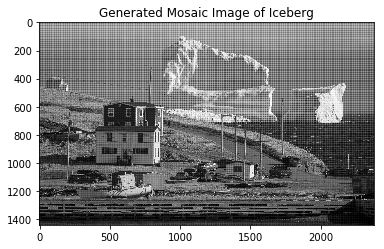

In [25]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

#crayon

readpic_crayons = read_image_jpg('crayons.jpg')
mosaic_crayons = get_mosaic_image(readpic_crayons)


readpic_iceberg = read_image_jpg('iceberg.jpg')
mosaic_iceberg = get_mosaic_image(readpic_iceberg)

#Mosaic pics of crayons
plt.imshow(mosaic_img1)
plt.title('Original Mosaic Image of Crayons')
plt.show()
plt.imshow(mosaic_crayons)
plt.title('Generated Mosaic Image of Crayons')
plt.show()

#Mosaic pics of icebergs
plt.imshow(mosaic_img2)
plt.title('Original Mosaic Image of Iceberg')
plt.show()
plt.imshow(mosaic_iceberg)
plt.title('Generated Mosaic Image of Iceberg')
plt.show()







Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

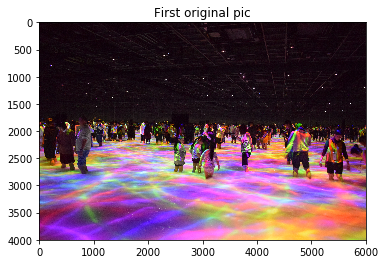

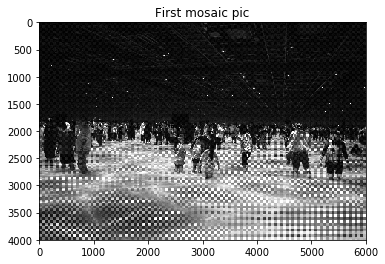

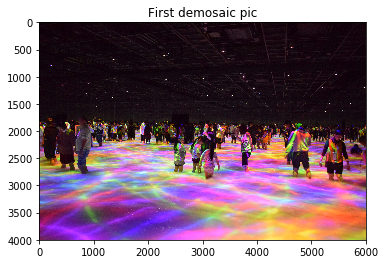

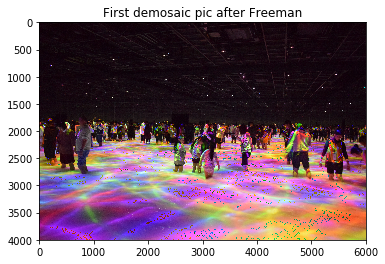

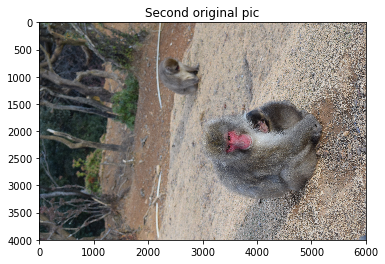

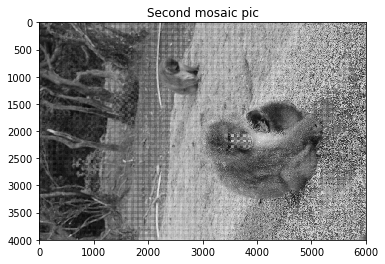

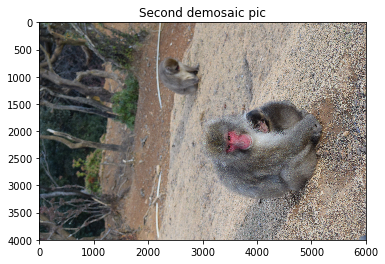

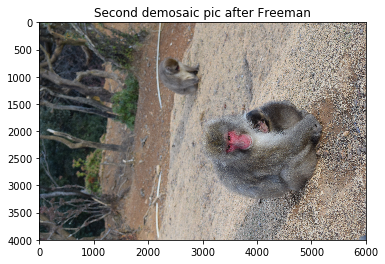

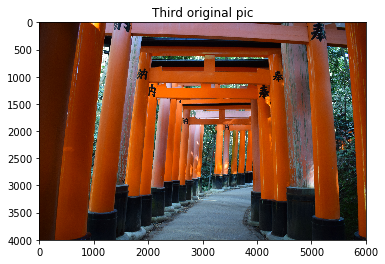

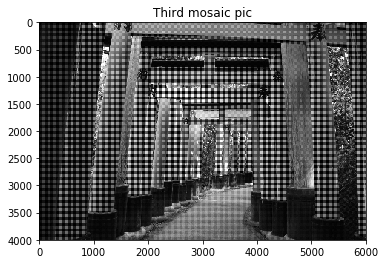

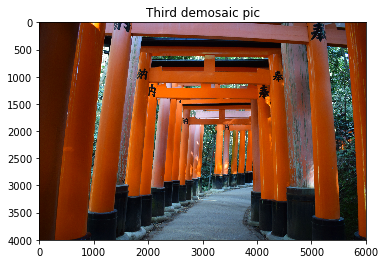

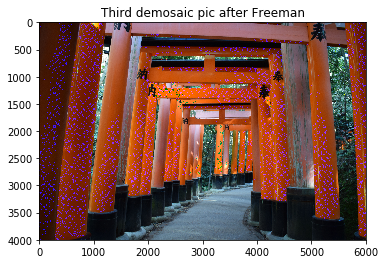

In [26]:
#first image of Teamlab, Tokyo, Japan
teamlab = read_image_jpg('teamlab.jpg')
teamlab_mosaic = get_mosaic_image(teamlab)
teamlab_demosaic = get_solution_image(teamlab_mosaic)
teamlab_freeman = get_freeman_solution_image(teamlab_mosaic)

plt.imshow(teamlab)
plt.title('First original pic')
plt.show()
plt.imshow(teamlab_mosaic)
plt.title('First mosaic pic')
plt.show()
plt.imshow(teamlab_demosaic.astype(int))
plt.title('First demosaic pic')
plt.show()
plt.imshow(teamlab_freeman)
plt.title('First demosaic pic after Freeman')
plt.show()



#second image of monkeys in Kyoto, Japan
monkey = read_image_jpg('monkey.jpg')
monkey_mosaic = get_mosaic_image(monkey)
monkey_demosaic = get_solution_image(monkey_mosaic)
monkey_freeman = get_freeman_solution_image(monkey_mosaic)


plt.imshow(monkey)
plt.title('Second original pic')
plt.show()

plt.imshow(monkey_mosaic)
plt.title('Second mosaic pic')
plt.show()

plt.imshow(monkey_demosaic.astype(int))
plt.title('Second demosaic pic')
plt.show()

plt.imshow(monkey_freeman)
plt.title('Second demosaic pic after Freeman')
plt.show()


#Third image of Fushimi Inari Taisha gates in Kyoto, Japan
gate= read_image_jpg('gate.jpg')
gate_mosaic = get_mosaic_image(gate)
gate_demosaic = get_solution_image(gate_mosaic)
gate_freeman = get_freeman_solution_image(gate_mosaic)

plt.imshow(gate)
plt.title('Third original pic')
plt.show()

plt.imshow(gate_mosaic)
plt.title('Third mosaic pic')
plt.show()
plt.imshow(gate_demosaic.astype(int))
plt.title('Third demosaic pic')
plt.show()
plt.imshow(gate_freeman)
plt.title('Third demosaic pic after Freeman')
plt.show()





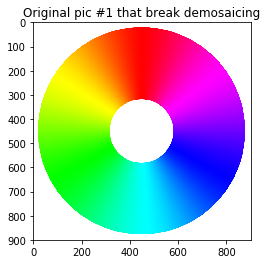

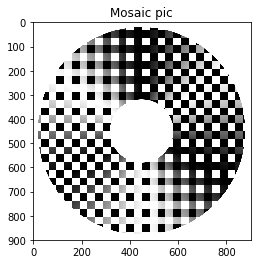

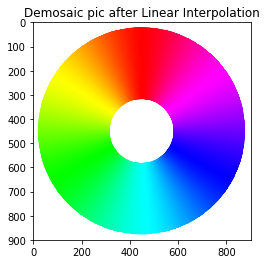

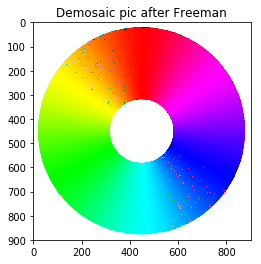

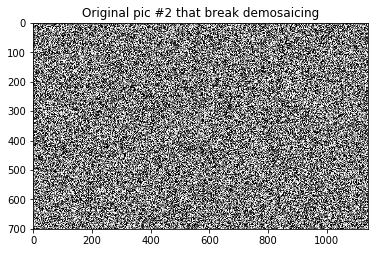

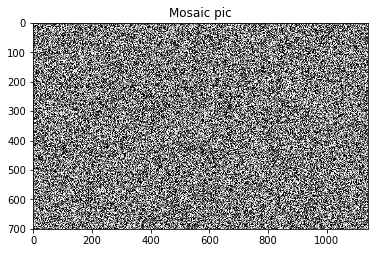

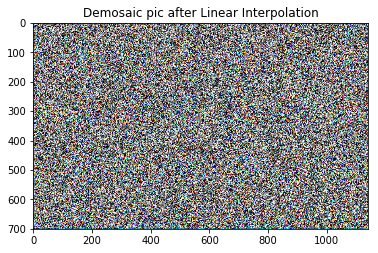

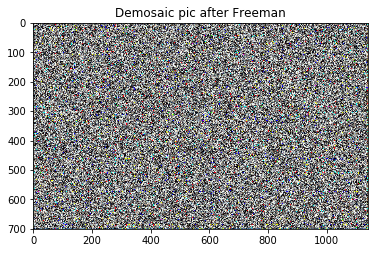

In [28]:
#image that break the function

contrast1 = read_image_jpg('contrast1.jpg')
contrast1_mosaic = get_mosaic_image(contrast1)
contrast1_demosaic = get_solution_image(contrast1_mosaic)
contrast1_freeman = get_freeman_solution_image(contrast1_mosaic)

plt.imshow(contrast1)
plt.title('Original pic #1 that break demosaicing')
plt.show()

plt.imshow(contrast1_mosaic)
plt.title('Mosaic pic')
plt.show()

plt.imshow(contrast1_demosaic.astype(int))
plt.title('Demosaic pic after Linear Interpolation')
plt.show()

plt.imshow(contrast1_freeman)
plt.title('Demosaic pic after Freeman')
plt.show()


contrast2 = read_image_jpg('contrast2.jpg')

contrast2_mosaic = get_mosaic_image(contrast2)
contrast2_demosaic = get_solution_image(contrast2_mosaic)
contrast2_freeman = get_freeman_solution_image(contrast2_mosaic)

plt.imshow(contrast2)
plt.title('Original pic #2 that break demosaicing')
plt.show()

plt.imshow(contrast2_mosaic)
plt.title('Mosaic pic')
plt.show()

plt.imshow(contrast2_demosaic.astype(int))
plt.title('Demosaic pic after Linear Interpolation')
plt.show()

plt.imshow(contrast2_freeman)
plt.title('Demosaic pic after Freeman')
plt.show()





### Bonus Points

In [29]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####